In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Wholesale customers data.csv')
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [18]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


**数据预处理**

In [36]:
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

In [64]:
X = data.iloc[:,2:]
y = data.iloc[:,:2]
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=0.2,random_state=420)

In [66]:
# 数据正则化
data_normalized = Normalizer().fit(Xtrain.values).transform(Xtrain)
data_normalized

array([[0.20826448, 0.50981445, 0.71456201, 0.06981613, 0.42544314,
        0.01549535],
       [0.94718089, 0.12727075, 0.23641331, 0.15205273, 0.0204706 ,
        0.08497164],
       [0.42825957, 0.45717799, 0.71012781, 0.03877237, 0.31815032,
        0.02403315],
       ...,
       [0.49550369, 0.17457931, 0.19630934, 0.81332377, 0.04597304,
        0.1478233 ],
       [0.3825201 , 0.44474453, 0.23029095, 0.76780959, 0.11432332,
        0.01566428],
       [0.43133953, 0.70032827, 0.32491924, 0.3353654 , 0.07747572,
        0.31534359]])

**使用轮廓系数找到最优K**

In [53]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score # 轮廓系数

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.86885,0.177510,0.221823,0.225154,0.047289,0.069711
1,0.26395,0.474068,0.666096,0.137271,0.251911,0.104774


Text(0, 0.5, 'score')

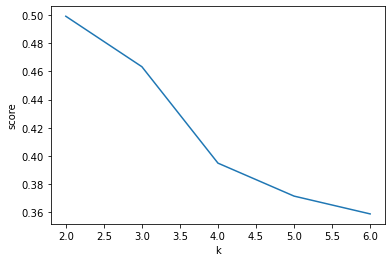

In [78]:
score= []

for i in range(2,7):
    cluster = KMeans(n_clusters=i, random_state=0).fit(data_normalized)
    score.append(silhouette_score(data_normalized,cluster.labels_))
    
plt.plot(range(2,7),score)
plt.xlabel('k')
plt.ylabel('score')

**建模及可视化分析**

In [127]:
# k=2时效果最好
k = 2
# 创建实例
km = KMeans(n_clusters=k)
# 训练数据
km.fit(data_normalized)
# 预测数据
predict = km.predict(data_normalized)
# 聚类中心
center = km.cluster_centers_

In [131]:
df = pd.DataFrame(center,
             columns=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen'])
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.86885,0.177510,0.221823,0.225154,0.047289,0.069711
1,0.26395,0.474068,0.666096,0.137271,0.251911,0.104774


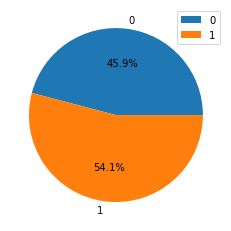

In [166]:
a = np.array(df.sum(axis=1))
plt.pie(x=a,labels=[0,1],autopct='%.1f%%')
plt.legend([0,1])

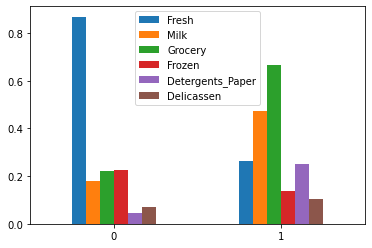

In [147]:
df.plot(kind='bar')
plt.xticks(df.index,['0','1'],rotation=0)
plt.show()

In [143]:
df.index

RangeIndex(start=0, stop=2, step=1)